# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將資料依照歲數, 將 20 到 70 歲切成11個區間? (In[4], Hint : 使用 numpy.linspace),  
  送入繪圖前的除了排序外, 還要注意什麼? (In[5])
- 如何調整對應資料, 以繪製長條圖(bar chart)? (In[7])

In [9]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [10]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [27]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

#自 20 到 70 歲，切 11 個點 (得到 10 組)
"""
Your Code Here
"""
bin_cut = np.linspace(20,70,11)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 

# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


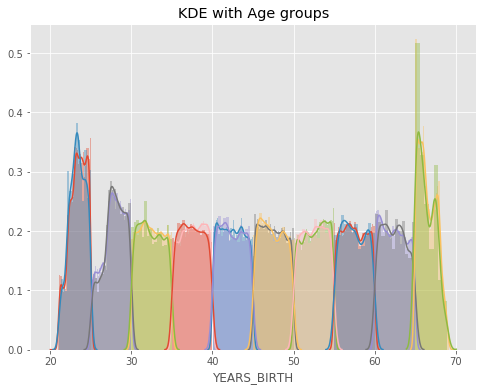

In [41]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group_sorted = np.sort(age_data['YEARS_BINNED'].unique())

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

In [32]:
year_group_sorted = age_data['YEARS_BINNED'].sort_index()
print(year_group_sorted)

0         (25.0, 30.0]
1         (45.0, 50.0]
2         (50.0, 55.0]
3         (50.0, 55.0]
4         (50.0, 55.0]
5         (45.0, 50.0]
6         (35.0, 40.0]
7         (50.0, 55.0]
8         (55.0, 60.0]
9         (35.0, 40.0]
10        (25.0, 30.0]
11        (55.0, 60.0]
12        (35.0, 40.0]
13        (35.0, 40.0]
14        (35.0, 40.0]
15        (20.0, 25.0]
16        (35.0, 40.0]
17        (25.0, 30.0]
18        (45.0, 50.0]
19        (30.0, 35.0]
20        (50.0, 55.0]
21        (40.0, 45.0]
22        (30.0, 35.0]
23        (65.0, 70.0]
24        (30.0, 35.0]
25        (50.0, 55.0]
26        (50.0, 55.0]
27        (40.0, 45.0]
28        (25.0, 30.0]
29        (25.0, 30.0]
              ...     
307481    (55.0, 60.0]
307482    (35.0, 40.0]
307483    (65.0, 70.0]
307484    (35.0, 40.0]
307485    (30.0, 35.0]
307486    (40.0, 45.0]
307487    (60.0, 65.0]
307488    (25.0, 30.0]
307489    (45.0, 50.0]
307490    (25.0, 30.0]
307491    (30.0, 35.0]
307492    (55.0, 60.0]
307493    (

In [33]:
year_group_sorted = age_data['YEARS_BINNED'].sort_values()
print(year_group_sorted)

86858     (20.0, 25.0]
150242    (20.0, 25.0]
258662    (20.0, 25.0]
258666    (20.0, 25.0]
258699    (20.0, 25.0]
258734    (20.0, 25.0]
89538     (20.0, 25.0]
258748    (20.0, 25.0]
89542     (20.0, 25.0]
258763    (20.0, 25.0]
89550     (20.0, 25.0]
150141    (20.0, 25.0]
150133    (20.0, 25.0]
258788    (20.0, 25.0]
89566     (20.0, 25.0]
27883     (20.0, 25.0]
258621    (20.0, 25.0]
89466     (20.0, 25.0]
150296    (20.0, 25.0]
150299    (20.0, 25.0]
150516    (20.0, 25.0]
89335     (20.0, 25.0]
28157     (20.0, 25.0]
258359    (20.0, 25.0]
150470    (20.0, 25.0]
258397    (20.0, 25.0]
28123     (20.0, 25.0]
27882     (20.0, 25.0]
258432    (20.0, 25.0]
150409    (20.0, 25.0]
              ...     
296609    (65.0, 70.0]
100010    (65.0, 70.0]
241658    (65.0, 70.0]
241655    (65.0, 70.0]
131936    (65.0, 70.0]
296573    (65.0, 70.0]
241687    (65.0, 70.0]
131911    (65.0, 70.0]
46519     (65.0, 70.0]
181278    (65.0, 70.0]
202812    (65.0, 70.0]
59794     (65.0, 70.0]
166182    (

In [43]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


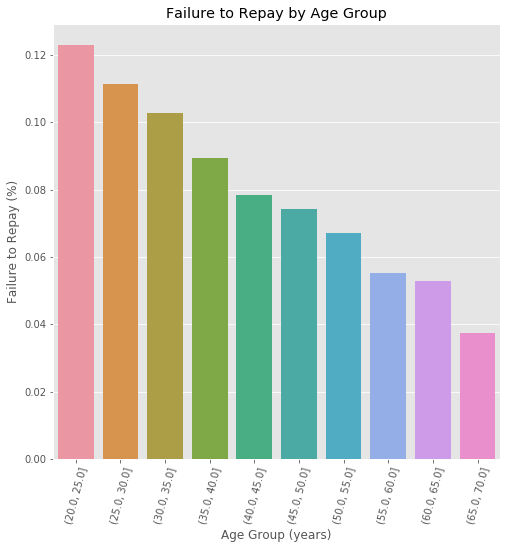

In [44]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_groups.index.astype(str)
py = age_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');